In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Creating a DataFrame
data = pd.read_pickle('../data/995,000_rows_preprocessed.pkl')
data = pd.DataFrame(data)

data = data[['content', 'type']]


In [5]:

data['type'].value_counts()

type
reliable                      218564
political                     194518
bias                          133232
fake                          104883
conspiracy                     97314
rumor                          56445
unknown                        43534
unreliable                     35332
clickbait                      27412
junksci                        14040
satire                         13160
hate                            8779
2018-02-10 13:43:39.521661         1
Name: count, dtype: int64

In [6]:
fake_data = data[data['type'] == 'fake']
reliable_data = data[data['type'] == 'reliable']

fake_data_lengths = fake_data['content'].apply(lambda x: len(x))
reliable_data_lengths = reliable_data['content'].apply(lambda x: len(x))

print(reliable_data_lengths.describe())
print(fake_data_lengths.describe())

count    218564.000000
mean        251.810060
std         283.796675
min           1.000000
25%          81.000000
50%         177.000000
75%         351.000000
max       14047.000000
Name: content, dtype: float64
count    104883.000000
mean        217.662557
std         319.598280
min           1.000000
25%          51.000000
50%         127.000000
75%         276.000000
max       10014.000000
Name: content, dtype: float64


In [7]:
#Take only articles with length < 1000 words
small_reliable_articles = reliable_data_lengths[reliable_data_lengths<1000]
small_fake_articles = fake_data_lengths[fake_data_lengths<1000]

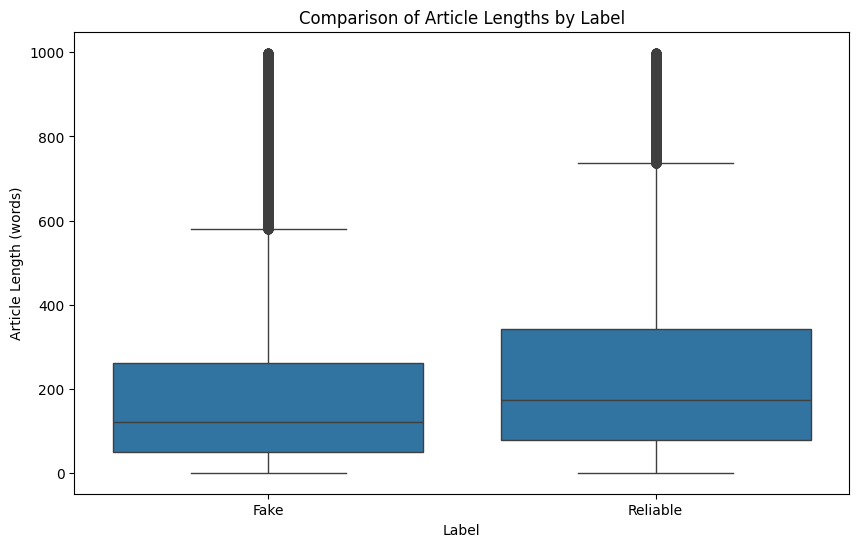

In [8]:
#Boxplot code, not workings as intended but correct plot is in report.
lengths_df = pd.DataFrame({
    'Length': pd.concat([small_fake_articles, small_reliable_articles]),
    'Label': ['Fake'] * len(small_fake_articles) + ['Reliable'] * len(small_reliable_articles)
})
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Length', data=lengths_df)
plt.title('Comparison of Article Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Article Length (words)')
plt.show()